In [2]:
from __future__ import absolute_import, division, print_function
import sys
print(sys.version)


import tensorflow as tf
import tensorflow.keras as keras

import numpy as np 
import matplotlib.pyplot as plt

from PIL import Image

print(tf.__version__)

print ("ALL IMPORTED")

3.7.2 (tags/v3.7.2:9a3ffc0492, Dec 23 2018, 23:09:28) [MSC v.1916 64 bit (AMD64)]
1.13.1
ALL IMPORTED


In [3]:
dataset = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = dataset.load_data()


print(len(test_images))
print(len(test_labels))
print(train_images.shape)
print(train_labels.shape)



10000
10000
(60000, 28, 28)
(60000,)


In [4]:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images /255.0
test_images = test_images / 255.0

3


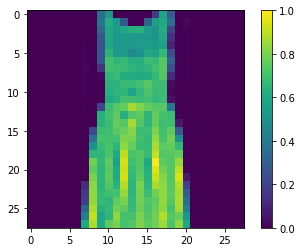

In [5]:
nb = 332

im = train_images[nb]
plt.figure()
plt.imshow(im)
plt.colorbar()
print(train_labels[nb])

In [6]:
layers = [
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
]

theReseau = keras.Sequential(layers)



Instructions for updating:
Colocations handled automatically by placer.


In [7]:
theReseau.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
theReseau.fit(train_images, train_labels, epochs = 8)

Epoch 1/8
60000/60000 [==============================] - 8s 134us/sample - loss: 0.5023 - acc: 0.8238
Epoch 2/8
60000/60000 [==============================] - 8s 130us/sample - loss: 0.3788 - acc: 0.8625
Epoch 3/8
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3370 - acc: 0.8769
Epoch 4/8
60000/60000 [==============================] - 8s 125us/sample - loss: 0.3129 - acc: 0.8853
Epoch 5/8
60000/60000 [==============================] - 8s 130us/sample - loss: 0.2942 - acc: 0.8912
Epoch 6/8
60000/60000 [==============================] - 8s 134us/sample - loss: 0.2808 - acc: 0.8962
Epoch 7/8
60000/60000 [==============================] - 9s 151us/sample - loss: 0.2686 - acc: 0.9012
Epoch 8/8
60000/60000 [==============================] - 9s 142us/sample - loss: 0.2581 - acc: 0.9045


In [9]:
loss, acc  = theReseau.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 61us/sample - loss: 0.3385 - acc: 0.8805


(28, 28)
(1, 28, 28)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Trouser


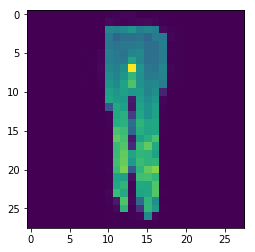

In [41]:
#data = Image.open("shoes.jpg")
data = Image.open("pants.jpeg")
#data = Image.open("vrac.jpg")


data = data.resize((28,28),0)
shoes  = data.convert("L")
mat = -np.asarray(shoes)
print(mat.shape)
plt.imshow(mat)
mat = (np.expand_dims(mat,0))

print(mat.shape)

prediction = theReseau.predict(mat)
print(prediction)
print(class_names[np.argmax(prediction[0])])

In [42]:
predictions = theReseau.predict(test_images)
print(predictions)

[[6.3635349e-07 5.4984706e-10 7.9143931e-08 ... 1.5038001e-02
  2.3942835e-07 9.8184639e-01]
 [1.2127514e-05 2.7116799e-13 9.9799663e-01 ... 3.1546076e-26
  4.9406899e-11 1.6299502e-15]
 [6.6645609e-09 1.0000000e+00 3.5447353e-10 ... 2.4905532e-25
  5.3766424e-15 5.3151064e-19]
 ...
 [1.7004622e-03 2.1277435e-11 9.9816697e-04 ... 2.0737017e-08
  9.9666554e-01 1.2310636e-10]
 [4.5215685e-08 9.9999762e-01 9.5425834e-10 ... 1.1415231e-12
  6.7736777e-10 1.0302873e-12]
 [6.5020176e-05 2.8591353e-07 1.5459707e-05 ... 2.6558633e-03
  3.4370949e-04 9.6939482e-05]]


In [43]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

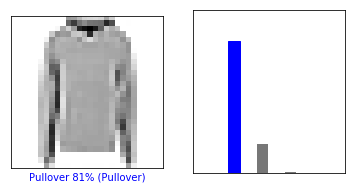

In [44]:
i = 3390
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

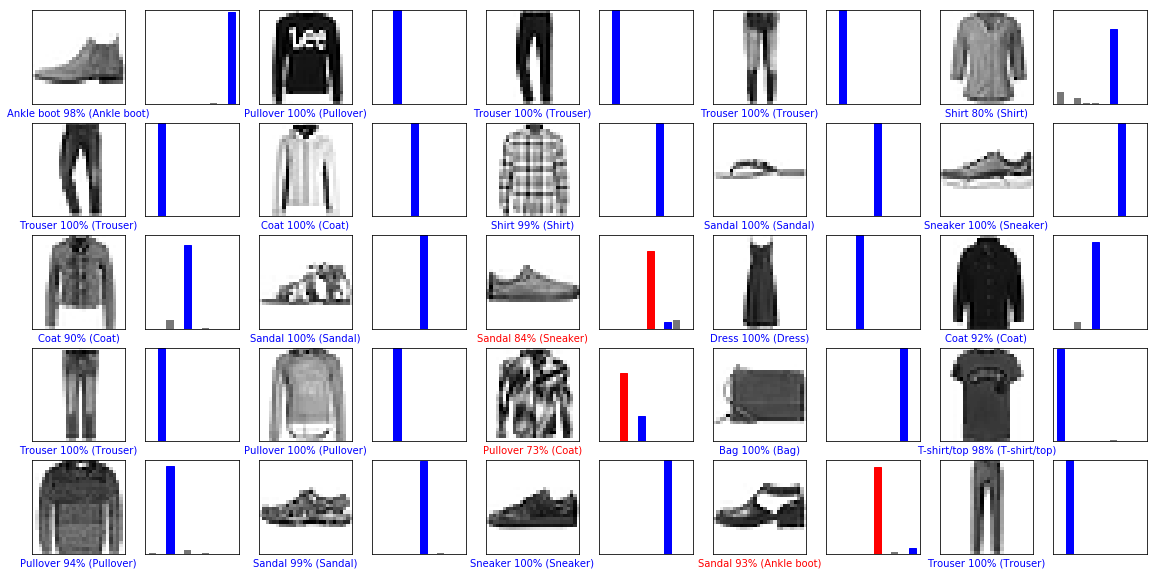

In [45]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()